In [1]:
import sklearn

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
print(digits.data)
print("次元：",digits.data.ndim)
print(digits.data.shape)
print(digits.target)
print(digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
次元： 2
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


In [4]:
digits.images[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

In [5]:
import matplotlib.pyplot as plt

#3番目の数字を表示
plt.imshow(digits.images[2], cmap=plt.cm.gray_r, interpolation="bicubic")
plt.show()

<Figure size 640x480 with 1 Axes>

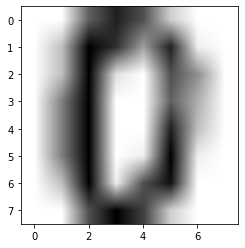

In [6]:
#31番目の数字を表示
plt.imshow(digits.images[30], cmap=plt.cm.gray_r, interpolation="bilinear")
plt.show()

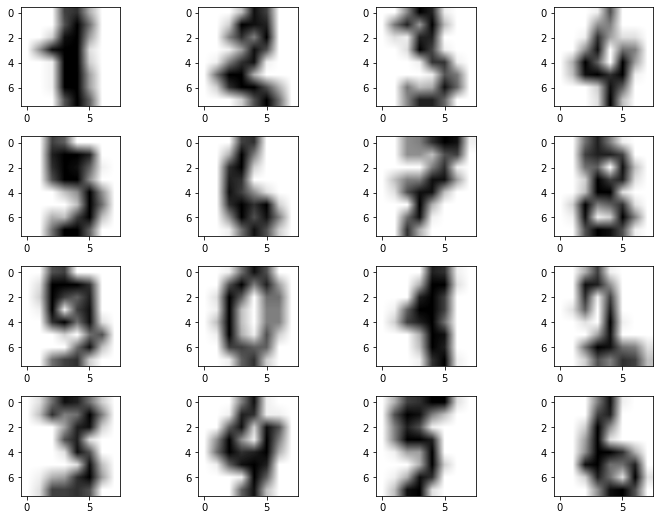

In [7]:
import numpy as np
row = 4
col = 4
digit_graph_count = row * col

#データオブジェクト保存用
subfig = []
x = np.linspace(-1,1,10)
fig = plt.figure(figsize=(12,9))

for i in range(1, digit_graph_count+1):
    subfig.append(fig.add_subplot(row,col,i))
    y = x**i
    subfig[i-1].imshow(digits.images[i],interpolation="bilinear",cmap=plt.cm.gray_r)
fig.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

In [8]:
from mpl_toolkits.mplot3d import Axes3D

all_fratures = digits.data
teacher_labels = digits.target

In [9]:
def getcolor(color):
    if color == 0:
        return "red"
    elif color == 1 :
        return "orange"
    elif color == 2 :
        return "yellow"
    elif color == 3 :
        return  "greenyellow"
    elif color == 4 :
        return  "green"
    elif color == 5 :
        return "cyan"
    elif color == 6 :
        return  "blue"
    elif color == 7 :
        return  "navy"
    elif color == 8 :
        return  "purple"
    elif color == 9 :
        return  "black"

In [10]:
#次元削除 ＝　主成分分析　＝　PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
three_features = pca.fit_transform(all_fratures)

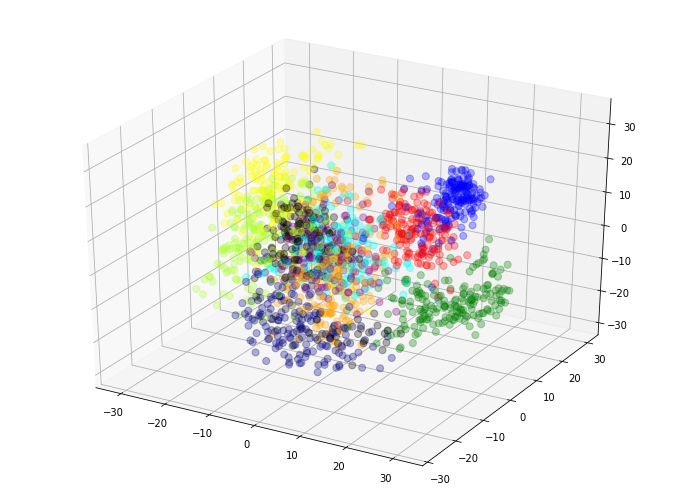

In [11]:
fig = plt.figure(figsize=(12,9))
subfig = fig.add_subplot(111,projection="3d")
colors = list(map(getcolor,teacher_labels))

subfig.scatter(three_features[ : ,0],three_features[ : ,1], three_features[ : ,2], s=50, c=colors, alpha=0.3)
plt.show()

In [12]:
from sklearn import svm,metrics
images_and_labels = list(zip(digits.images, digits.target))
print("教師データ：",digits.target)

教師データ： [0 1 2 ... 8 9 8]


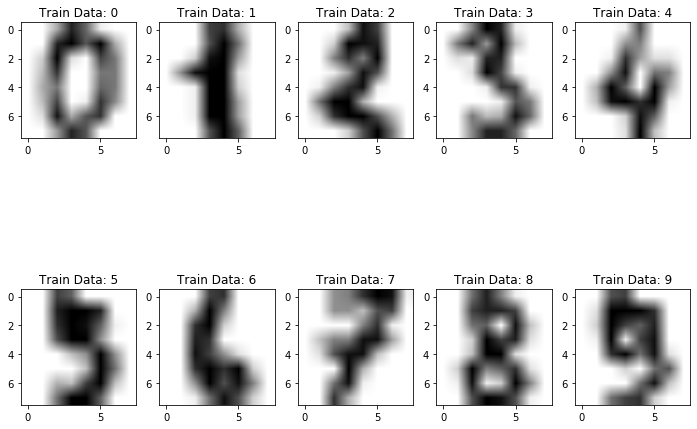

In [13]:
fig = plt.figure(figsize=(12,9))

for index,(a,b) in enumerate(images_and_labels[ : 10]):
    plt.subplot(2,5,index+1)
    plt.imshow(a,interpolation="bilinear",cmap=plt.cm.gray_r)
    plt.title("Train Data: %i" % b)

In [14]:
print(digits.images.shape)

(1797, 8, 8)


In [15]:
num_samples = len(digits.images)
data = digits.images.reshape(num_samples,-1)
import sklearn.svm as svm

In [16]:
print(data.shape)

(1797, 64)


In [22]:
model = svm.SVC(gamma=0.001)
train_features = data[ : num_samples//2]
train_teacher_labels = digits.target[ : num_samples//2]
test_features = data[num_samples//2 : ]
test_teacher_labels = digits.target[num_samples//2 : ]

model.fit(train_features, train_teacher_labels)

SVC(gamma=0.001)

In [23]:
expected = test_teacher_labels
predicted = model.predict(test_features)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(model,classification_report(test_teacher_labels,predicted))
print(confusion_matrix(test_teacher_labels,predicted))

SVC(gamma=0.001)               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0 

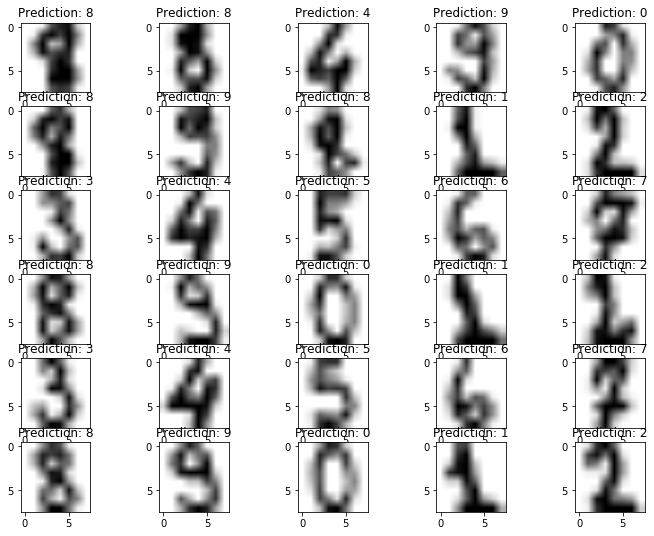

In [25]:
fig = plt.figure(figsize=(12,9))
digits_and_predictions = list(zip(digits.images[num_samples//2 : ], predicted))
for index,(a,b) in enumerate(digits_and_predictions[ : 30]):
    plt.subplot(6,5,index+1)
    plt.imshow(a,interpolation="bilinear",cmap=plt.cm.gray_r)
    plt.title("Prediction: %i" % b)
plt.show()